Differences-in-Differences models: Applications with STATA
---
*Empirical Methods in Economics and Business Studies*

**Zhiyuan Chen**

*Renmin Business School*

`Recent Update: 2025--04-19`, added the practice problem for small number of clusters 

`Recent Update: 2024-04-11`

`First Version: 2020-11-24`


# An Overview

* [Canonical Diff-In-Diff Model](#canonical_did)
    * [Benchmark Model](#benchmark)
    * [Event Study and Dynamic Treatment Effects](#event_study)
    
* [Inference: Clustered Standard Errors](#inference)
    * [Simulation Evidence](#simulations)
    * [What is Simulation?](#what_simulation)
    * [Replication study of `Bertrand, Duflo, and Mullainathan (2004)`](#replication)

# Difference-in-Difference Model <a class="anchor" id="canonical_did"></a>

## Benchmark Model <a class="anchor" id="benchmark"></a>
The DGP for the DID estimator can be written as 
$$
y_{it} = \alpha_0 +\alpha \tau_{it}  + X_{it}'\beta+\delta t +\theta_i +\epsilon_{it} \tag{1}
$$
where $\tau_{it}=1$ if $t\geq t_0$ and $i$ is in the treated group. This is also called the _two-way fixed effects model_. 

##  Dynamic treatment effects and Event Study <a class="anchor" id="event_study"></a>

The baseline DID model can be easily extend to allow for **dynamic treatment effects**:
$$
y_{it} = \beta_0 +\sum_{j=0}^J\alpha_j\tau_{t-j}^{g_{i}}+\delta t +\theta_i +\epsilon_{it} \tag{2}
$$

As a robustness check, we usually pretend the policy is enacted at some time earlier than the actual adoption time to validate the common trend assumption. We can run an **Event-study regression** like:
$$
y_{it} = \beta_0 + \sum_{j=-J_0,j\neq-1}^{J}\alpha_j\tau_{it-j} +\delta t +\theta_i +\varepsilon_{it}
$$
where $\tau_{it-j} = 1$ if $t_i-j=0$ and $i$ is in the treated group.

# Stata Examples for Diff-in-Diff

In [1]:
* An Example of Diff-in-Diff (Based on "http://www.princeton.edu/~otorres/DID101.pdf")
clear all
set more off
qui use Panel101.dta,clear //or you may type "use "http://dss.princeton.edu/training/Panel101.dta", clear

In [2]:
describe


Contains data from Panel101.dta
  obs:            70                          
 vars:             9                          3 Jan 2020 11:28
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
country         long    %14.0g     country    Country
year            int     %8.0g                 Year
y               double  %10.0g                Outcome Y
y_bin           float   %9.0g                 Binary outcome Y
x1              float   %9.0g                 Predictor x1
x2              float   %9.0g                 Predictor x2
x3              float   %9.0g                 Predictor x3
opinion         float   %18.0g     agree      Categorical variable
op              float   %9.0g                 
------------------------------------------------------------------------------

In [3]:
summarize


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
     country |         70           4    2.014441          1          7
        year |         70      1994.5     2.89302       1990       1999
           y |         70    1.85e+09    3.02e+09  -7.86e+09   8.94e+09
       y_bin |         70          .8    .4028881          0          1
          x1 |         70    .6480006      .46807  -.5675749   1.446412
-------------+---------------------------------------------------------
          x2 |         70    .1338694    1.371099  -1.621761   2.530277
          x3 |         70     .761851    1.446332  -1.165387   7.168922
     opinion |         70    2.442857    1.137448          1          4
          op |         70          .5    .5036102          0          1


In [4]:
* Generate time and treated variables
drop if missing(year)&missing(country)
qui gen time = (year>=1994)
qui gen treated = (country>4)
qui g lny = log(y)
qui gen tau = time*treated  //interaction between group dummy and time dummy


(0 observations deleted)






## Two-way Fixed Effects Regressions

In [5]:
reg y tau treated time, r


Linear regression                               Number of obs     =         70
                                                F(3, 66)          =       2.17
                                                Prob > F          =     0.0998
                                                R-squared         =     0.0827
                                                Root MSE          =     3.0e+09

------------------------------------------------------------------------------
             |               Robust
           y |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         tau |  -2.52e+09   1.45e+09    -1.73   0.088    -5.42e+09    3.81e+08
     treated |   1.78e+09   1.05e+09     1.70   0.094    -3.11e+08    3.86e+09
        time |   2.29e+09   9.00e+08     2.54   0.013     4.92e+08    4.09e+09
       _cons |   3.58e+08   7.61e+08     0.47   0.640    -1.16e+09    1.88e+09
-------------

In [8]:
* regression using hashtag
reg y time##treated, r


Linear regression                               Number of obs     =         70
                                                F(3, 66)          =       2.17
                                                Prob > F          =     0.0998
                                                R-squared         =     0.0827
                                                Root MSE          =     3.0e+09

------------------------------------------------------------------------------
             |               Robust
           y |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      1.time |   2.29e+09   9.00e+08     2.54   0.013     4.92e+08    4.09e+09
   1.treated |   1.78e+09   1.05e+09     1.70   0.094    -3.11e+08    3.86e+09
             |
time#treated |
        1 1  |  -2.52e+09   1.45e+09    -1.73   0.088    -5.42e+09    3.81e+08
             |
       _cons |   3.58e+08   7.61e+08     0.47  

In [10]:
* for logged model
reg lny tau treated time, r


Linear regression                               Number of obs     =         56
                                                F(3, 52)          =       0.38
                                                Prob > F          =     0.7677
                                                R-squared         =     0.0238
                                                Root MSE          =     1.3179

------------------------------------------------------------------------------
             |               Robust
         lny |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         tau |  -.5524526   .8683878    -0.64   0.527       -2.295    1.190095
     treated |   .2565522   .7679171     0.33   0.740    -1.284386    1.797491
        time |   .5730012   .7430261     0.77   0.444    -.9179898    2.063992
       _cons |   20.98152   .6992099    30.01   0.000     19.57845    22.38459
--------------

In [27]:
qui xtreg y tau time, fe // FE estimator: two-way fixed effects model
est sto fe_iid
qui xtreg y tau time, fe vce(robust)  
est sto fe_rob
qui xtreg y tau time, fe cluster(country)
est sto fe_clus

In [28]:
%html
esttab fe_iid fe_rob fe_clus, se nogaps label html

This front-end or document format cannot display HTML

## Event Study

In [29]:
*Placebo polices and event study
g y_norm = y/1e12  //normalize the data for a better view
forv s = -4(1)5 {
    if `s'<0 {
        local i = -`s'
        qui gen tau_`i' = treat*(year>=(1994+`s'))
        }
    else if `s'==0 {
        continue 
        }
    else if `s'>0 {
        qui gen tau`s' = treat*(year>=(1994+`s'))
        }
}

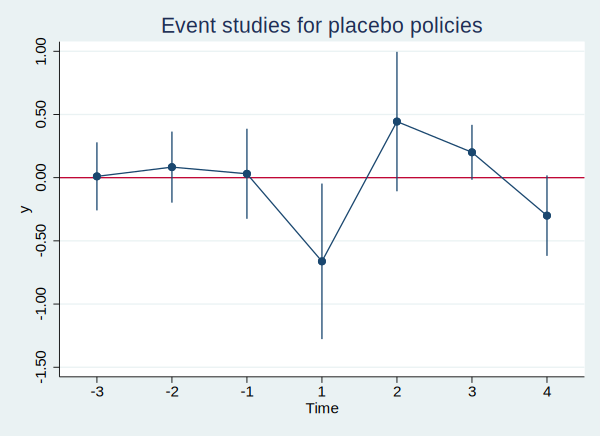

In [37]:
//event-study
qui reg y_norm tau_3 tau_2 tau_1 tau1 tau2 tau3 tau4 time treat, r
coefplot, keep(tau*) ///
          coeflabels(tau_3 = "-3" tau_2 = "-2" tau_1 = "-1" tau1 = "1" tau2 = "2" tau3 = "3" tau4 = "4") ///
          ciopt(recast(rspike))  /// rarea, rbar, rspike, rline...see help file for more
          rescale(100) format(%9.2f) ///
          recast(connected)  ///
          vertical yline(0) ytitle(y) xtitle("Time") title("Event studies for placebo policies")

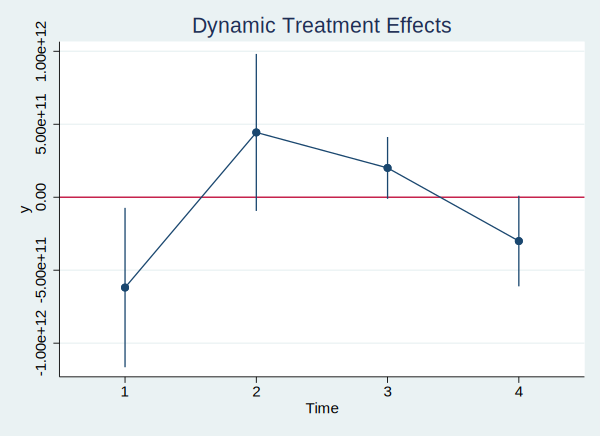

In [38]:
*Dynamic Treatment effects
qui reg y tau1 tau2 tau3 tau4 time treat, r
coefplot, keep(tau*) ///
          coeflabels(tau1 = "1" tau2 = "2" tau3 = "3" tau4 = "4") ///
          ciopt(recast(rspike))  /// rarea, rbar, rspike, rline...see help file for more
          rescale(100) format(%9.2f) ///
          recast(connected)  ///
          vertical yline(0) ytitle(y) xtitle("Time") title("Dynamic Treatment Effects")

## Inference: Cluster-Robust standard errors <a class="anchor" id="inference"></a>

### General Guidelines
Consider the model:
$$
y_{itg} = \alpha_0 + \alpha\tau_{itg}+ X_{itg}'\beta + \theta_i + \delta t + \epsilon_{itg} \tag{3}
$$
where $g$ represent the _group_ indicator that individual $i$ belongs to. 

>In practice, $g$ can be village, county, industry, province, state, nation, etc. The problem is how to get the correct standard errors. `Bertrand, Duflo, and Mullainanthan (2004)` illustrates the importance of clustering standard errors at the state-level when the policy intervention is enacted at the state level. 
> Including fixed effects generally does NOT control for all the within-cluster correlation of the errors and one should still use the Cluster-Robust Variance Estimator (`Cameron and Miller, 2015`). 

In Stata, the cluster-robust standard error for FE estimator can be obtained via:
* `xtreg y x, fe vce(robust)` clusters at _individual-level_
* `xtreg y x, fe vce(cluster id_g)` clusters at _group-level_ : If not available, we can use bootstrap to obtain a consistent estimate of the variance:
* `xtreg y x, fe vce(boot, reps(400) seed(10101))`

## Choosing the appropriate level to cluster
According to `Cameron and Miller (2015)`, there are two guiding principles:
1. We should think about clustering at the level whenever we believe that both the regressors and the errors might be correlated within the cluster;
2. If we define very large clusters, there are very few clusters to average over. This results in a poor estimate of the variance. 

As in many estimation problems, we face a bias-variance tradeoff--larger and fewer clusters have less bias but more variability. 

In practice, researcher often cluster at progressively higher levels and stop clustering when there is relatively little change in the standard errors. 

## Dealing with Few Clusters
First, there is no clear-cut definition of "few". "Few" may range from less than 20 clusters to less than 50 clusters in the balanced case and even more in the unbalanced cased. Few clusters leads to two problems:
> 1. A downward-biased cluster-robust variance matrix estimate for the error
> 2. An overrejection (confidence intervals are too narrow) for coefficient estimates

The first-best solution is to collect more data. If we are too lazy to do that, several solutions are handy if we face the problem of few clusters. You are strongly recommended to read `Bertrand Duflo and Mulainathan (2004, Section IV)`, Section VI in `Cameron and Miller (2015)` and Chapter 8 of `Angrist and Pischke (2009)` for more details.

# Simulation Evidence <a class="anchor" id="simulation"></a>

## What is Monte Carlo Simulation ? <a class="anchor" id="what_simulation"></a>
* Econometric theories are based on assumptions on DGP
    * DGP(Data Generating Process) defines the way that different variables in data are generated and related 
    * For example, simple OLS regression model states that the outcome $y_i$ should be generated through $y_i=\alpha_0+\alpha_1 x_i+\epsilon_i$ with $\alpha_0$ and $\alpha_1$ being some constants, $x_i$ being some iid random variable, and $\epsilon_i$ being some mean-zero i.i.d random variable that is orthogonal to $x_i$.
* Real-life datasets usually are not consistent with the DGP assumed in the econometic theory 

* Computer simulations are useful to give insight into complicated problems when detailed analytic studies are not possible. Because stochastic simulations intorduce randomness into the study, they are often referred to as __Monte Carlo methods__ after the capital city of the principality of Monaco, which is known for gambling
    * Econometricians resort to __Monte Carlo studies__ to evaluate the properties of estimators, or compare a proposed estimator to another in a context where analytical derivation of those properties is not feasible. 
    * An Monte Carlo simulation of an estimator approximates the sampling distribution of an estimator by simulation methods for a particular data-generating process (DGP) and sample size.

## Monte Carlo Study using Stata  <a class="anchor" id="mc_stata"></a>

* Random number generators in Stata
    * Uniform/Normal draws
* Moments of Simulated Stata
    * `Postfile` Command

## Pseudorandom-number generators in Stata
The random-number generator is the software today is not really random. It is more accurate to use the term pseudorandom numbers. Psuedorandom-number generators use deterministric devices to produce long chains of numbers that mimic the realizations from some target distributions.  

>A good introduction to the random-number generators in Stata can be found [here](https://blog.stata.com/2016/03/10/how-to-generate-random-numbers-in-stata/).

**Setting the seed is important for the replication of your study!**

### Uniform draws

In [102]:
* Single draw of a uniform number
clear 
set seed 10101
scalar u = runiform()

In [103]:
disp u

.30422325


In [43]:
* 100 draws of uniform numbers
qui set obs 1000
set seed 10101
qui g x = runiform()

In [44]:
list x in 1/5, clean


              x  
  1.   .3042232  
  2.   .5540206  
  3.   .2794988  
  4.   .2006274  
  5.   .1246266  


In [45]:
* First 3 autocorrelations for the uniform draws
g t = _n
tsset t
pwcorr x L.x L2.x L3.x, star(0.05)



        time variable:  t, 1 to 1000
                delta:  1 unit


             |        x      L.x     L2.x     L3.x
-------------+------------------------------------
           x |   1.0000 
         L.x |   0.0107   1.0000 
        L2.x |  -0.0004   0.0109   1.0000 
        L3.x |  -0.0210   0.0000   0.0108   1.0000 


### Normal draws

In [46]:
* normal and uniform
clear 
qui set obs 1000
set seed 10101
g uniform = runiform()
g stnormal = rnormal() // N(0,1)
g norm52 = rnormal(5,2)

In [47]:
tabstat uniform stnormal norm52, stat(mean sd skew kurt min max) col(stat)


    variable |      mean        sd  skewness  kurtosis       min       max
-------------+------------------------------------------------------------
     uniform |  .5031233  .2922443 -.0264117  1.809826  .0005628  .9996441
    stnormal |  .0230095  1.023687  -.193405   3.12781 -4.119125  2.615001
      norm52 |  5.090733  1.983719 -.1014361  2.986503 -1.140269  11.52456
--------------------------------------------------------------------------


## Moments of simulated data
We begin by drawing a random sample of size $N$ from a uniform distribution and calculate its mean value.
Recall the central limit theorem states that
$$
\sqrt{N}(\bar{X}-\mu)/\sigma \rightarrow \mathbf{N}(0,1)
$$
We are going to demonstrate this result using simulation.

In [48]:
*Example 1: the mean of simulated data from standard normal distribution
drop _all 
global nobs 500
qui set obs $nobs
set seed 12345  //make the results reproducible

In [49]:
gen x = runiform() // use rnormal(mu, sigma) for more general cases
sum x




    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
           x |        500    .4862399    .2909374   .0034476   .9978225


(bin=20, start=.00344757, width=.04971875)


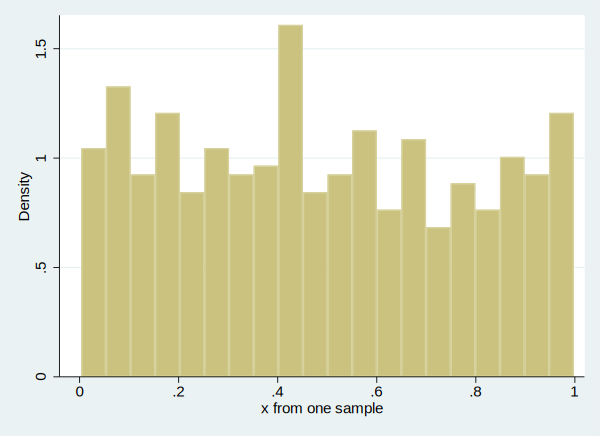

In [50]:
histogram x, bin(20) xtitle("x from one sample")

## The `postfile` command
### Multiple estimates from independently drawn random sample

If we had many estimates, each from an independently drawn random sample, I could estimate the mean and standard deviation of the sampling distribution of the estimator. To this end, we need to repeat the following process:
1. Draw from the DGP (econometric model)
2. Compute the estimate
3. Store the estimate

We can use commands `postfile`, `post`, and `postclose` to store the estimates in memory and write all the stored estimates to a dataset. 

In [53]:
global path "D:\CloudDrive\坚果云\Computation\Lectures\RMEB\8-Simulation"
qui cd $path

In [9]:
*Example 2: Estimated means of three draws with fixed sample size
set seed 12345
global nobs 500
qui postfile buffer mhat using mcs, replace 
// creates a place in memory called "buffer" in which we store the results
// `mhat` is the name of the variable
// the dataset is called `mcs.dta`
// `replace` so that any previou versions of `mcs.dta` will be replaced as we iterate
forvalues i = 1/3 {
    quietly {
      drop _all
      set obs $nobs
      gen y = runiform()
      summ y
    }
    post buffer (r(mean))    // one can also use mean y and _b[y] to store the results
}
postclose buffer

In [10]:
use mcs.dta, clear
list




     +----------+
     |     mhat |
     |----------|
  1. | .4862399 |
  2. | .4988218 |
  3. | .5002428 |
     +----------+


In [11]:
sum mhat


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        mhat |          3    .4951015    .0077072   .4862399   .5002428


In [54]:
*Example 3: The mean of 2000 estimated means with sample size fixed
set seed 12345
global nobs 500
qui postfile buffer mhat using mcs, replace 
// creates a place in memory called "buffer" in which we store the results
//mhat is the name of the variable
// the dataset is called mcs.dta
//replace so that any previou versions of mcs.dta will be replaced
forvalues i = 1/2000 {
    quietly {
      drop _all
      set obs $nobs
      gen y = runiform()
      sum y
    }
    post buffer (r(mean))    // one can also use mean y and _b[y] to store the results
}
postclose buffer

In [55]:
use mcs.dta,clear
summarize mhat




    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        mhat |      2,000     .499899    .0128632   .4607484    .543883


The average of 2,000 estimates is close to the true value of the mean of the distribution

(bin=50, start=.4607484, width=.00166269)


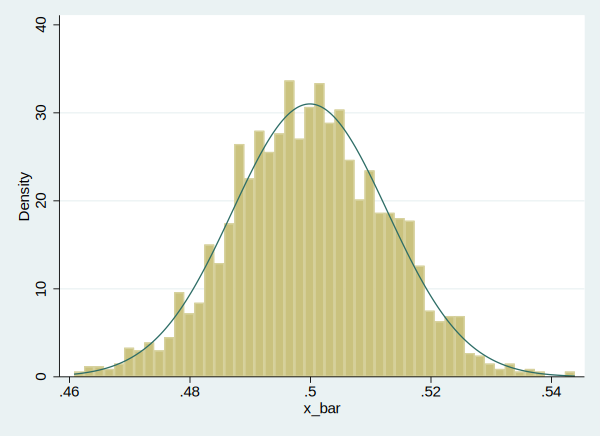

In [56]:
hist mhat, normal bin(50) xtitle("x_bar")

In [57]:
* Example 4: The mean and standard errors
set seed 12345
postfile buffer mhat sehat using mcs, replace
forv i = 1/2000 {
    qui{
        drop _all
        set obs 500
        gen y = rnormal()
        qui sum y
        post buffer (r(mean)) (r(sd))
    }
}
postclose buffer
use mcs.dta,clear

In [58]:
summarize


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        mhat |      2,000    .0013082    .0452751  -.1576152   .1466376
       sehat |      2,000    .9988071    .0317767   .8925015   1.099087


### Use MCS to evaluate the asymptotic properties
We want to evaluate the properties of the estimator. We can gradually increase the sample size and look at the performance of the estimator.

In [59]:
* Example 5: The mean and se with increasing sample size 
set seed 12345
postfile buffer n mhat sehat using mcs, replace
forv i = 100(200)10000 {
    qui{
        drop _all
        set obs `i'
        gen y = rnormal()
        qui sum y
        post buffer (r(N)) (r(mean)) (r(sd))
    }
}
postclose buffer
use mcs.dta,clear

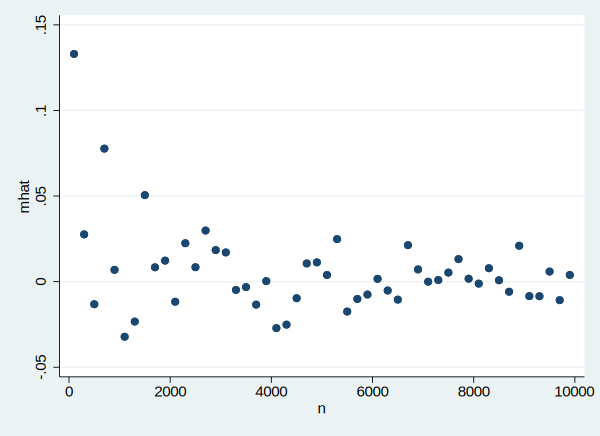

In [60]:
twoway scatter mhat n

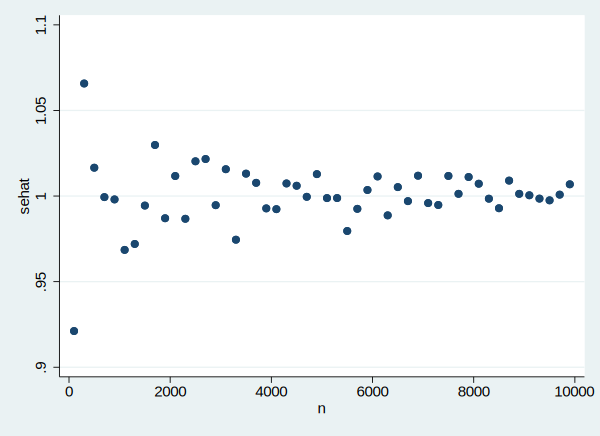

In [61]:
twoway scatter sehat n

## Using `simulate` to perform Monte Carlo simulations
The `simulate` command runds a specified command # times, where the user specifies #.

### Verifying Central Limit Theorem using Simulations

We first define a program for drawing one sample, then we use `simulate` to exceute the program multiple times

In [62]:
* Program to draw 1 sample of size 30 from uniform and return sample mean
capture program drop onesample
program onesample, rclass
        drop _all
        qui set obs 30
        g x = runiform()
        summ x
        return scalar samplemean = r(mean)
 end

In [63]:
* Run program onesample once to check it
set seed 10101
onesample
return list




    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
           x |         30     .380269    .2706183    .014999    .886691


scalars:
         r(samplemean) =  .3802689793519676


In [66]:
* Run program onesample 10,000 times to get 10,000 sample means
simulate xbar = r(samplemean), seed(10101) reps(10000) nodots: onesample


      command:  onesample
         xbar:  r(samplemean)



(bin=40, start=.30608404, width=.0095183)


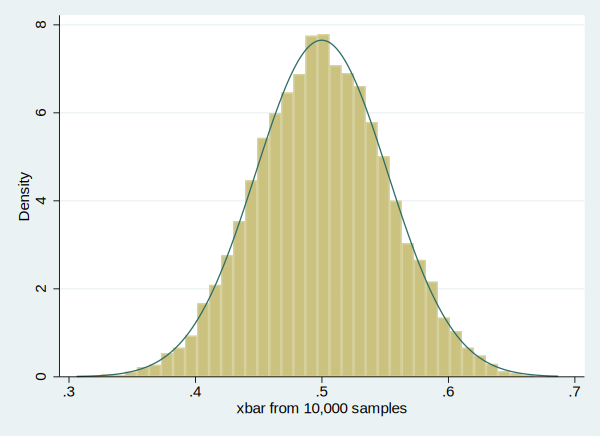

In [67]:
hist xbar, normal xtitle("xbar from 10,000 samples")

In [70]:
*Loop over simulation times
postfile buffer n xbar using mcsimulate, replace
forv i = 10(10)1000{
    qui simulate xbar = r(samplemean), seed(10101) reps(`i') nodots: onesample
    qui summ xbar
    post buffer (r(N)) (r(mean))
}
postclose buffer

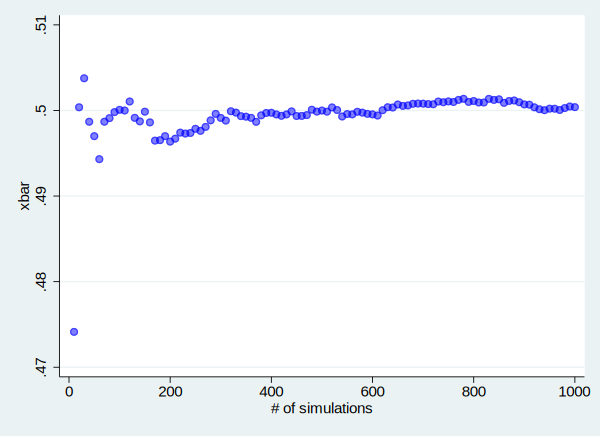

In [71]:
use mcsimulate.dta,clear
twoway scatter xbar n, color(blue%50) xtitle("# of simulations")

## Replication Study of `Bertrand, Duflo, and Mullainathan (2004)` <a class="anchor" id="replication"></a>

## A Three-Step Procedure
* Generate datasets using well-specified DGP
* Obtain estimates by applying the proposed estimators
* Repeat the experiments many times and see the overall performance

## Data Generation for Monte Carlo Study

### DGP
The DID model we use is as follows:
$$
y_{igt} = \alpha + \beta \tau_{gt}+\mathbf{X}'_{igt}\boldsymbol{\gamma}+\delta t+ \theta_i+\epsilon_{igt}
$$
where $\tau_{gt}$ means the group-level treatment indicator

* We use the following DGP: 
     $$
      y_{igt} = \gamma x_{igt}+\theta_i+\delta_t+\epsilon_{igt}
     $$  
for $i=1,\cdots,20,000$, $t=2010,\cdots,2019$, $g=1,\cdots,60$.
* $x_{igt}\sim Uniform[0,1]$, $\gamma=0.6$, $\theta_{i}\sim N(0.6,0.5^2)$ 
    
* $\delta_t = 0.9 \cdot (t-2019)$
  
* $\epsilon_{igt}=v_{gt}+u_{it}$, where $u_{it}\sim N(0,1)$ and $v_{gt+1}=0.8 v_{gt}+\eta_{gt}$, for $\eta_{gt}\sim N(0, 0.2^2)$  

### Practice Problem 
You may need to repeat the Monte Carlo Experiments with the following condition changed:
* $g = 1,\cdots, 15$ 
  
In your study, please refer to `Cameron and Miller (2015, JHR)` for using the right method to calculate the standard errors. 

In [ ]:
//Simulate the Dataset in Stata
clear all
set seed 10101
set obs 20000 //number of individuals
g id = _n
g g = runiformint(1,60) //group number is constant over time
g theta = rnormal(0.6,0.5) //individual heterogeneity
expand 10  //expand them to be panel data of 10 years
bys id: g t=_n+2009 // generate years
set seed 10101
g u = rnormal() // the iid firm-level errors

In [ ]:
%head 20

,id,g,theta,t,u
1,1,20,.39315918,2010,.39221546
2,1,20,.39315918,2011,.84961545
3,1,20,.39315918,2012,.25830072
4,1,20,.39315918,2013,-1.7003772
5,1,20,.39315918,2014,-.33317977
6,1,20,.39315918,2015,1.2652421
7,1,20,.39315918,2016,2.8105304
8,1,20,.39315918,2017,1.5158677
9,1,20,.39315918,2018,.33430195
10,1,20,.39315918,2019,-.15467469


In [ ]:
* simulate the group-specific errors
//simulate the AR(1) for 100 years to obtain the stationary distribution of it
//Approach 1: using Stata
//(1) generate initial v_g
cap drop v
g v = .  //v_gt
set seed 10101
forv i = 1/60 {
    scalar v0 = rnormal(0, 0.1)
    qui replace v = v0 if g==`i'&t==2010
}
cap drop epsilon
g epsilon = . // epsilon_gt
scalar sigma_e = 0.2
scalar rho = 0.8 

In [ ]:
//(2) simulation for v_gt
sort id t
set seed 10101
forv n = 1/100 {
 qui replace epsilon = rnormal(0,sigma_e) if t==2010
 sort g t id 
 qui bys g t: replace epsilon = epsilon[_n-1] if _n>1&_n<=_N & t==2010
 qui bys id (t): replace v = rho*v + epsilon if _n==1 //100 simulations to obtain first-period error
}

In [ ]:
forv t = 2011/2019{
 qui replace epsilon = rnormal(0,sigma_e) if t==`t'
 sort g t id 
 qui bys g t: replace epsilon = epsilon[_n-1] if _n>1&_n<=_N & t==`t'
}
qui bys id (t): replace v = rho*v[_n-1] + epsilon if _n>1& _n<=_N

In [ ]:
//error shocks by group-year
tabstat v, by(t) stat(mean median min max)


Summary for variables: v
     by categories of: t 

       t |      mean       p50       min       max
---------+----------------------------------------
    2010 | -.0501068 -.0580293 -.8063513   .892416
    2011 | -.0443824  -.056544 -.9237199  .6788957
    2012 |  -.062103 -.0195953 -.8300363  1.089506
    2013 | -.0352549 -.0393594 -1.041821  1.217458
    2014 | -.0165832 -.0186456 -.8348754  1.231978
    2015 |  .0091538  .0122948 -.8223498  1.201708
    2016 | -.0274291 -.0452694 -.7625657  1.087302
    2017 | -.0211134  .0055577 -.6713353  .7539396
    2018 |   .011107  .0278274 -.8739493  .6389277
    2019 | -.0211881 -.0186248 -.6662028  .9012512
---------+----------------------------------------
   Total |   -.02579 -.0186248 -1.041821  1.231978
--------------------------------------------------


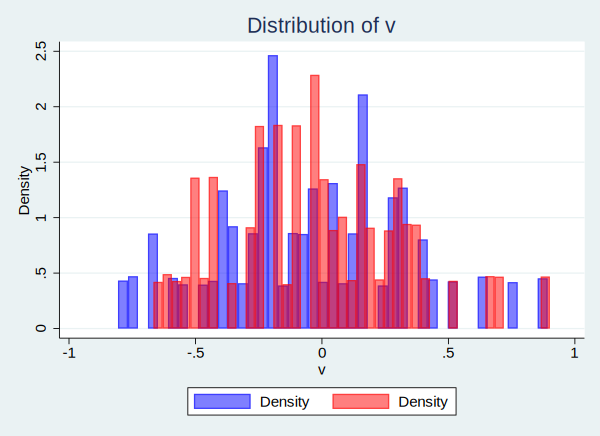

In [ ]:
//stationary distribution of v
twoway hist v if t==2010, color(blue%50) || hist v if t==2019, color(red%50) ///
      title("Distribution of v")

In [ ]:
* Simulate for y and save the dataset 
scalar gamma = 0.6
scalar delta = 0.1
set seed 10101
g x = runiform() //x_igt
g dt = delta*(t-2019) //delta_t
g e = u + v
g y = gamma*x + theta + dt + e
save simdata.dta,replace

In [ ]:
keep if g<=20
save simdata_sub.dta,replace

### Monte Carlo Simulation

### Clustering at individual level

In [59]:
global N = 500 //simulation times (It takes around 20 mins)
matrix Result = J($N, 5, .) //matrix to store the results
use simdata.dta,clear
set seed 12345
forv i = 1/$N {
   //disp("Processing `i'-th experiment...")
   cap drop grnum gt year treat ehat
   qui g grnum=.
   forv j = 1/60 {
        scalar r = runiform(0,1)
        qui replace grnum = r if g==`j' //group-specific random number
    }
    egen gt = cut(grnum), group(2)  //randomly assign them into two groups
    scalar treat_year = runiform(2013, 2016)
    qui{
        g year = (t>=treat_year) 
        g treat = gt*year
        xtset id t
        reg y treat x i.g i.t, vce(cluster id)
        predict ehat,r
        forv l=1/3 {
            pwcorr ehat L`l'.ehat
            scalar corr`l' = r(rho)
        }
    }
        scalar b = _b[treat]
        scalar se = _se[treat]
        matrix Result[`i',1]=(b,se,corr1,corr2,corr3)
}

In [60]:
drop _all
set obs $N
svmat double Result, names(c)
save Result1.dta,replace
clear matrix



number of observations (_N) was 0, now 500

number of observations will be reset to 500
Press any key to continue, or Break to abort
number of observations (_N) was 0, now 500

(note: file Result1.dta not found)
file Result1.dta saved



#### Distribution of $\hat{\beta}$

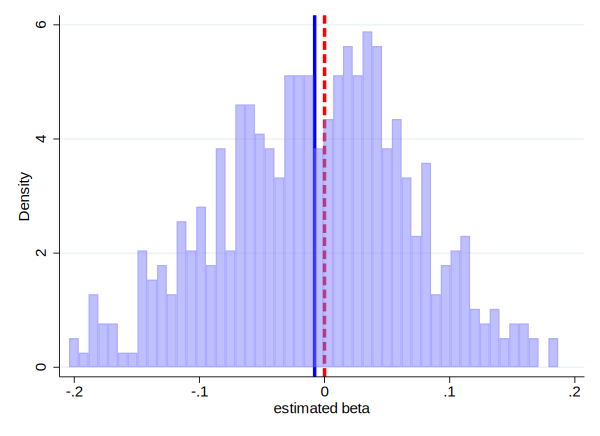

In [64]:
*(a) histogram of estimated beta
qui sum c1
local c1_mean = r(mean)
twoway hist c1, bin(50) xline(0, lc(red) lwidth(thick) lp(dash)) /// 
                xline(`c1_mean', lc(blue) lwidth(thick)) ///
                lc(blue%10) fc(blue%50) fi(inten50) xti("estimated beta") graphregion(color(white)) 

#### Auto-correlations $corr(\epsilon_t,\epsilon_{t-1})$

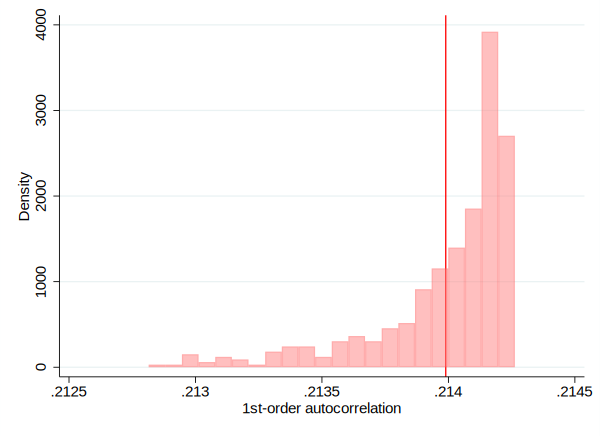

In [65]:
*(b) histograms of auto-correlations
qui sum c3
local c3_mean = r(mean)
qui sum c4
local c4_mean = r(mean)
qui sum c5
local c5_mean = r(mean)
twoway hist c3, xline(`c3_mean', lc(red) lwidth(medium)) lc(red%10) fc(red%50) fi(inten50) ///
                graphregion(color(white))  xti("1st-order autocorrelation") 

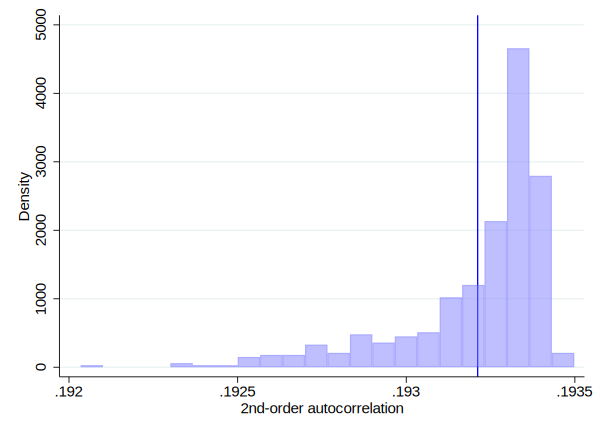

In [66]:
*Second-order autocorrelation
twoway hist c4, xline(`c4_mean', lc(blue) lwidth(medium)) lc(blue%10) fc(blue%50) fi(inten50)  ///
                graphregion(color(white))  xti("2nd-order autocorrelation") 

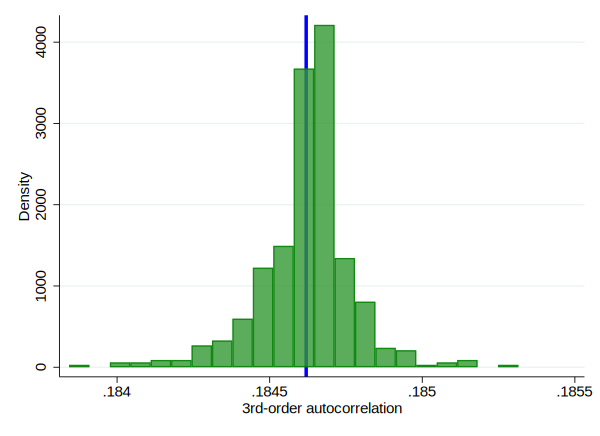

In [73]:
*3rd-order autocorrelation
twoway hist c5, xline(`c5_mean', lc(blue) lwidth(thick)) lc(green%80) fc(green%80) fi(inten80) ///
                 graphregion(color(white))  xti("3rd-order autocorrelation") 

#### Rejection Rate
The *rejection rate* is percentage of experiments with $T-statistic$ greater than 1.96 in total excercises:
$$
RejectionRate = \frac{\sum_{i} \mathbb{I}(T>1.96)}{N}
$$

> If  OLS were to provide consistent estimates and standard
errors, we would expect to *reject the null hypothesis of no effect ($\beta$ = 0)
roughly 5%* of the time if we choose the threshold of the t−statistic to
be 1.96

In [74]:
qui g tstat = c1/c2
qui sum tstat if tstat>1.96
scalar rej_rate = r(N)/$N

In [79]:
disp("Rejection rate:")
disp(rej_rate)


Rejection rate:

.384


### Clustering at group-year level

In [80]:
global N = 500
matrix Result = J($N, 5, .) //matrix to store the results
use simdata.dta,clear
egen gr_t = group(g t)
set seed 12345
forv i = 1/$N {
   //disp("Processing `i'-th experiment...")
   cap drop grnum gt year treat ehat
   qui g grnum=.
   forv j = 1/60 {
        scalar r = runiform(0,1)
        qui replace grnum = r if g == `j' //group-specific random number
    }
    egen gt = cut(grnum), group(2)  //randomly assign them into two groups
    scalar treat_year = runiform(2013, 2016)
    qui{
        g year = (t>=treat_year) 
        g treat = gt*year
        xtset id t
        reg y treat x i.g i.t, vce(cluster gr_t)
        predict ehat,r
        forv l=1/3 {
            pwcorr ehat L`l'.ehat
            scalar corr`l' = r(rho)
        }
    }
        scalar b = _b[treat]
        scalar se = _se[treat]
        matrix Result[`i',1]=(b,se,corr1,corr2,corr3)
}

In [81]:
drop _all
qui set obs $N
svmat double Result, names(c)
save Result2.dta,replace
clear matrix




number of observations will be reset to 500
Press any key to continue, or Break to abort
number of observations (_N) was 0, now 500

(note: file Result2.dta not found)
file Result2.dta saved



#### Rejection Rate

In [84]:
qui g tstat = c1/c2
qui sum tstat if tstat>1.96
scalar rej_rate = r(N)/$N

In [85]:
disp("Rejection rate:")
disp(rej_rate)


Rejection rate:

.128


### Clustering at group level

In [86]:
global N = 500
matrix Result = J($N, 5, .) //matrix to store the results
use simdata.dta,clear
egen gr_t = group(g t)
set seed 12345
forv i = 1/$N {
   //disp("Processing `i'-th experiment...")
   cap drop grnum gt year treat ehat
   qui g grnum=.
   forv j = 1/60 {
        scalar r = runiform(0,1)
        qui replace grnum = r if g == `j' //group-specific random number
    }
    egen gt = cut(grnum), group(2)  //randomly assign them into two groups
    scalar treat_year = runiform(2013, 2016)
    qui{
        g year = (t>=treat_year) 
        g treat = gt*year
        xtset id t
        reg y treat x i.g i.t, vce(cluster g)
        predict ehat,r
        forv l=1/3 {
            pwcorr ehat L`l'.ehat
            scalar corr`l' = r(rho)
        }
    }
        scalar b = _b[treat]
        scalar se = _se[treat]
        matrix Result[`i',1]=(b,se,corr1,corr2,corr3)
}

In [87]:
drop _all
qui set obs $N
svmat double Result, names(c)
save Result3.dta,replace
clear matrix




number of observations will be reset to 500
Press any key to continue, or Break to abort
number of observations (_N) was 0, now 500

(note: file Result3.dta not found)
file Result3.dta saved



#### Rejection Rate 

In [88]:
qui g tstat = c1/c2
qui sum tstat if tstat>1.96
scalar rej_rate = r(N)/$N

In [89]:
disp("Rejection rate:")
disp(rej_rate)


Rejection rate:

.024


### Monte Carlo Simulation for FE Model Estimates

#### Clustering at individual level

In [90]:
global N = 500
matrix Result = J($N, 5, .) //matrix to store the results
use simdata.dta,clear
egen gr_t = group(g t)
set seed 12345
forv i = 1/$N {
   //disp("Processing `i'-th experiment...")
   cap drop grnum gt year treat ehat
   qui g grnum=.
   forv j = 1/60 {
        scalar r = runiform(0,1)
        qui replace grnum = r if g == `j' //group-specific random number
    }
    egen gt = cut(grnum), group(2)  //randomly assign them into two groups
    scalar treat_year = runiform(2013, 2016)
    qui{
        g year = (t>=treat_year) 
        g treat = gt*year
        xtset id t
        xtreg y treat x i.t, fe vce(cluster id)
        predict ehat, e  // the pure error component
        forv l=1/3 {
            pwcorr ehat L`l'.ehat
            scalar corr`l' = r(rho)
        }
    }
        scalar b = _b[treat]
        scalar se = _se[treat]
        matrix Result[`i',1]=(b,se,corr1,corr2,corr3)
}

In [91]:
drop _all
qui set obs $N
svmat double Result, names(c)
save Result3.dta,replace
clear matrix




number of observations will be reset to 500
Press any key to continue, or Break to abort
number of observations (_N) was 0, now 500

file Result3.dta saved



##### Distribution of $\hat{\beta}$

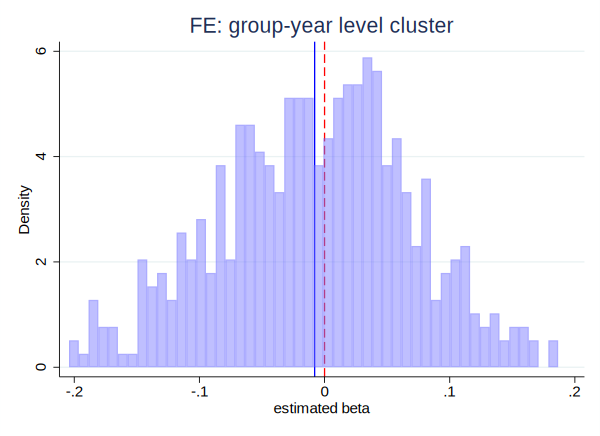

In [92]:
*(a) histogram of estimated beta
qui sum c1
local c1_mean = r(mean)
twoway hist c1, bin(50) xline(0, lc(red) lwidth(medium) lp(dash)) xline(`c1_mean', lc(blue) lwidth(medium)) ///
                lc(blue%10) fc(blue%50) fi(inten50) ///
                xti("estimated beta") title("FE: group-year level cluster") graphregion(color(white))

##### Auto-correlations

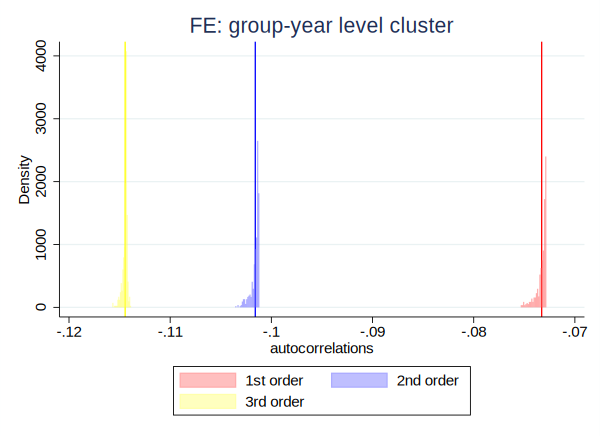

In [93]:
*(b) histograms of auto-correlations
qui sum c3
local c3_mean = r(mean)
qui sum c4
local c4_mean = r(mean)
qui sum c5
local c5_mean = r(mean)
twoway hist c3, xline(`c3_mean', lc(red) lwidth(medium)) lc(red%10) fc(red%50) fi(inten50) ///
    || hist c4, xline(`c4_mean', lc(blue) lwidth(medium)) lc(blue%10) fc(blue%50) fi(inten50)  ///
    || hist c5, xline(`c5_mean', lc(yellow) lwidth(medium)) lc(yellow%10) fc(yellow%50) fi(inten50) ///
       xti("autocorrelations")  title("FE: group-year level cluster")  graphregion(color(white)) legend(order(1 "1st order" 2 "2nd order" 3 "3rd order"))

#### Rejection rate

In [94]:
qui g tstat = c1/c2
qui sum tstat if tstat>1.96
scalar rej_rate = r(N)/$N

In [95]:
disp("Rejection rate:")
disp(rej_rate)


Rejection rate:

.384


#### Clustering at group level

In [96]:
global N = 400
matrix Result = J($N, 5, .) //matrix to store the results
use simdata.dta,clear
set seed 12345
forv i = 1/$N {
   //disp("Processing `i'-th experiment...")
   cap drop grnum gt year treat ehat
   qui g grnum=.
   forv j = 1/60 {
        scalar r = runiform(0,1)
        qui replace grnum = r if g == `j' //group-specific random number
    }
    egen gt = cut(grnum), group(2)  //randomly assign them into two groups
    scalar treat_year = runiform(2013, 2016)
    qui{
        g year = (t>=treat_year) 
        g treat = gt*year
        xtset id t
        xtreg y treat x i.t, vce(cluster g)
        predict ehat, e 
        forv l=1/3 {
            pwcorr ehat L`l'.ehat
            scalar corr`l' = r(rho)
        }
    }
        scalar b = _b[treat]
        scalar se = _se[treat]
        matrix Result[`i',1]=(b,se,corr1,corr2,corr3)
}

In [97]:
drop _all
qui set obs $N
svmat double Result, names(c)
save Result5.dta,replace
clear matrix




number of observations will be reset to 400
Press any key to continue, or Break to abort
number of observations (_N) was 0, now 400

(note: file Result5.dta not found)
file Result5.dta saved



##### Distribution of $\hat{\beta}$

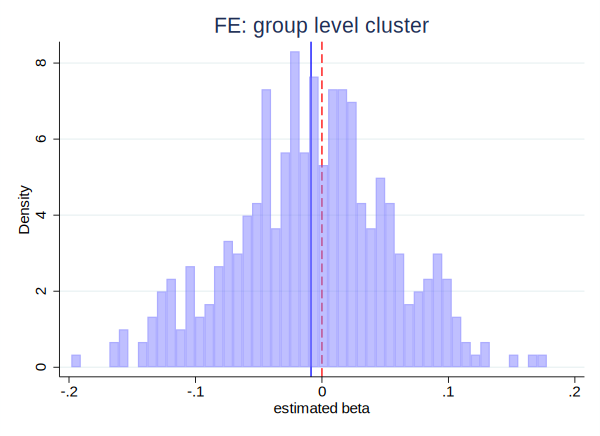

In [98]:
*(a) histogram of estimated beta
qui sum c1
local c1_mean = r(mean)
twoway hist c1, bin(50) xline(0, lc(red) lwidth(medium) lp(dash)) xline(`c1_mean', lc(blue) lwidth(medium)) ///
                lc(blue%10) fc(blue%50) fi(inten50) ///
                xti("estimated beta") title("FE: group level cluster") graphregion(color(white))  //

##### Auto-correlations

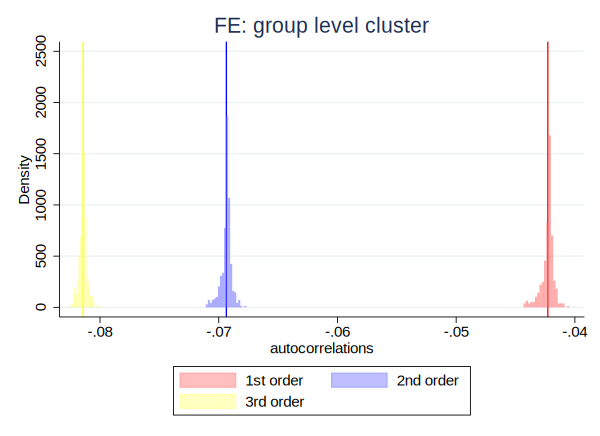

In [99]:
*(b) histograms of auto-correlations
qui sum c3
local c3_mean = r(mean)
qui sum c4
local c4_mean = r(mean)
qui sum c5
local c5_mean = r(mean)
twoway hist c3, xline(`c3_mean', lc(red) lwidth(medium)) lc(red%10) fc(red%50) fi(inten50) ///
    || hist c4, xline(`c4_mean', lc(blue) lwidth(medium)) lc(blue%10) fc(blue%50) fi(inten50)  ///
    || hist c5, xline(`c5_mean', lc(yellow) lwidth(medium)) lc(yellow%10) fc(yellow%50) fi(inten50) ///
       xti("autocorrelations")  title("FE: group level cluster")  graphregion(color(white)) legend(order(1 "1st order" 2 "2nd order" 3 "3rd order"))

##### Rejection Rate
The rejection rate is defined as the ratio between the number of estimations that reject the null hypothesis and the total number of experiments:
$$
\text{Rejection Rate} = \frac{\text{Number of estimations that reject the null}}{\text{Total Number of Experiments}}
$$

 For effective estimation methods, we expect that the rejection rate to be close to the chosen level of significance. 

In [100]:
qui g tstat = c1/c2
qui sum tstat if tstat>1.96
scalar rej_rate = r(N)/$N

In [101]:
disp("Rejection rate:")
disp(rej_rate)


Rejection rate:

.0125


#### Summary of Results
We can summarize the results for rejection rate as below:

|Level of cluster|OLS|FE |
|:---            |:--|:--|
|Individual      | 38.4%  | 38.4%   |
|Group-year      | 12.8%  | n.a.  |
|Group           | 2.4%  |  1.25% |

When we cluster at higher levels, we take the serial correlation among errors into consideration, which gives us more reliable standard errors and allows to do valid inference. 

# References

* Angrist, J. D., and J. S. Pischke. (2008): “Mostly harmless econometrics: An empiricist’s companion.” 
* Bertrand, M., E. Duflo, and S. Mullainathan. (2004): “How much should we trust DID?,” Quarterly Journal of Economics,  1–27.
* Colin Cameron, A., and D. L. Miller. (2015): “A practitioner’s guide to cluster- robust inference,” Journal of Human Resources, 50, 317–72.
* A. Colin Cameron and Pravin K. Trivedi, Microeconometrics Using Stata, Second Edition, 2010, Chapter 4